# Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn .ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error

# Load Data

In [28]:
suicide = pd.read_csv('suicide.csv')
suicide.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [29]:
suicide.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

#Data cleaning 

In [30]:
suicide['suicides_no'] = suicide['suicides_no'].fillna(0)
suicide = suicide.dropna(subset=['population'])
suicide= suicide[suicide['population'] !=0]

In [31]:
suicide['suicide_rate']=suicide['suicides_no'] /suicide['population'] * 100000
suicide.head()

,country,year,sex,age,suicides_no,population,suicide_rate
0,Albania,1985,female,15-24 years,0.0,277900.0,0.0
1,Albania,1985,female,25-34 years,0.0,246800.0,0.0
2,Albania,1985,female,35-54 years,0.0,267500.0,0.0
3,Albania,1985,female,5-14 years,0.0,298300.0,0.0
4,Albania,1985,female,55-74 years,0.0,138700.0,0.0


In [32]:
suicide.isnull().sum()

country         0
year            0
sex             0
age             0
suicides_no     0
population      0
suicide_rate    0
dtype: int64

# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

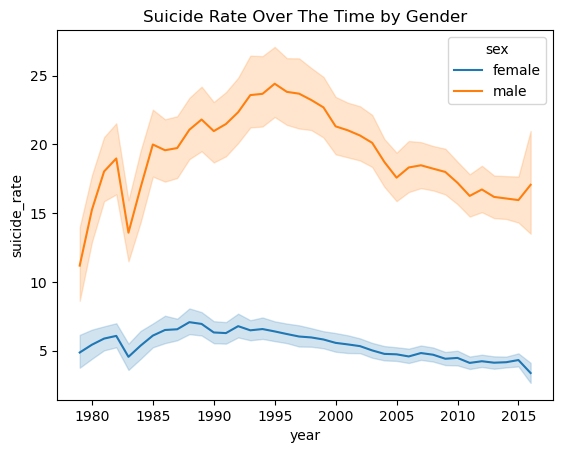

In [33]:
sns.lineplot( data=suicide,x='year',y='suicide_rate',hue='sex')
plt.title('Suicide Rate Over The Time by Gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

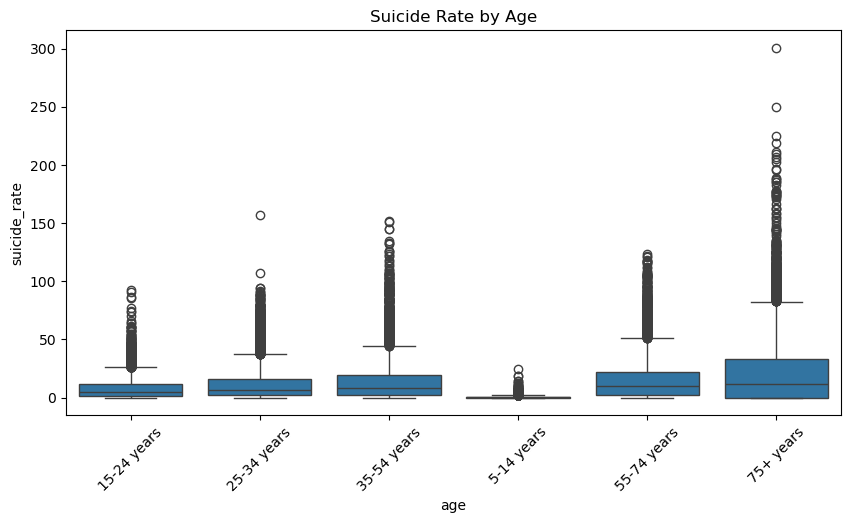

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(data = suicide, x='age', y='suicide_rate')
plt.title('Suicide Rate by Age')
plt.xticks(rotation=45)
plt.show

# Feature Engineering

In [41]:
features = suicide [['year','age','sex','country']]
features = pd.get_dummies(features,drop_first=True)
target = suicide['suicide_rate']

# Modeling

In [42]:
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.2,random_state=42)

In [37]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
preds= model.predict(X_test)

In [38]:
mae = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_absolute_error(y_test, preds))
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')

MAE: 46.97, RMSE: 1.70


# Visualization

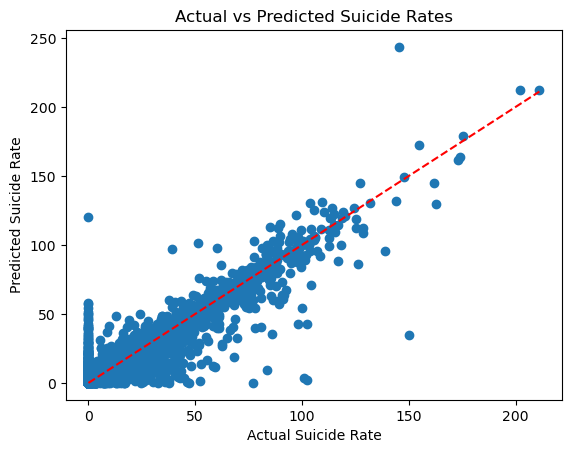

In [39]:
plt.scatter(y_test,preds)
plt.xlabel("Actual Suicide Rate")
plt.ylabel("Predicted Suicide Rate")
plt.title("Actual vs Predicted Suicide Rates")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.show()